In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [3]:
import os
print(os.listdir('C:/Users/SAI/Desktop/Final Participant Data Folder'))

['Final_Test.xlsx', 'Final_Train.xlsx', 'Sample_submission.xlsx']


In [4]:
train = pd.read_excel('C:/Users/SAI/Desktop/Final Participant Data Folder/Final_Train.xlsx')
test = pd.read_excel('C:/Users/SAI/Desktop/Final Participant Data Folder/Final_Test.xlsx')

In [5]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [7]:
# check for null values
round(train.isnull().sum()/len(train) * 100,2)

Qualification          0.00
Experience             0.00
Rating                55.39
Place                  0.42
Profile                0.00
Miscellaneous_Info    43.95
Fees                   0.00
dtype: float64

EDA

Converting Experience column from string by taking only numerical age value from data

In [8]:
train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] = train['Experience'].astype(int)

In [9]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


Now Analysing the Rating column

We can see there are more than 50 % missing values in rating column,

In [10]:
train['Rating'].fillna('-99%',inplace=True)

Making the Rating from percentage to 0,1,2 by setting them into bins and using pd.cut

In [11]:
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int) #taking the str without %

In [12]:
print("0-9% ",len(train[(train['Rating']>0) & (train['Rating']<10)]))
print("10-19% ",len(train[(train['Rating']>=10) & (train['Rating']<20)]))
print("20-29% ",len(train[(train['Rating']>=20) & (train['Rating']<30)]))
print("30-39% ",len(train[(train['Rating']>=30) & (train['Rating']<40)]))
print("And so-on..")

0-9%  1
10-19%  0
20-29%  0
30-39%  3
And so-on..


In [13]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
train['Rating'] = pd.cut(train['Rating'], bins=bins, labels=labels, include_lowest=True)

Now we have converted (-99 to 0) as 0,(0 to 10) as 1 and so on . We can see the the value counts 

In [14]:
train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

We can Transform the Place column into city and area to get clear analysis with the column.

Removing null values from place

In [15]:
train.Place.fillna('Unknown,Unknown',inplace=True)

Spliting the place into city and area

In [16]:
train['area'] = train['Place'].str.split(",").str[0]
train['city'] = train['Place'].str.split(",").str[1]

In [17]:
#using re to remove spaces
train['city'] = train['city'].apply(lambda x: re.sub(' +','',str(x)))

In [18]:
train['city'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 25
Sector5                  1
nan                      1
Name: city, dtype: int64

There is no city as Sector 5 so lets correct it to Delhi .

In [19]:
# city contains some improper data.
train[(train['city'] == "nan") | (train['city'] == "Sector5")]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,area,city
2169,BDS,11,0,"Dwarka, Sector 5, Delhi",Dentist,NaN,250,Dwarka,Sector5
3980,BDS,23,0,e,Dentist,NaN,250,e,nan


In [20]:
train['city'] = np.where(train['city']=="Sector5","Delhi", train['city'])

In [21]:
#Removing Nan
train['city'].loc[3980] = "Unknown"

In [22]:
train['city'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Unknown                 26
Name: city, dtype: int64

In [23]:
train['area'].value_counts()

HSR Layout          75
Andheri West        70
Dwarka              68
Banjara Hills       64
Mulund West         54
                    ..
Austin Town          1
GTB Nagar            1
Indirapuram          1
JP Nagar 4 Phase     1
Thevara              1
Name: area, Length: 867, dtype: int64

In [24]:
#As we have made place into city and area we can drop the place column
train.drop('Place',axis=1,inplace=True)

Coming to Qualification column we can see that there are data containing multiple degrees like MBBS,MD.
The Data present is also having detailed info which is not useful to the model.
so lets make the data shorter considering only the degress

In [25]:
train['Qualification_count'] = train['Qualification'].apply(lambda x: len(x.split(",")))
train['Qualification_count'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_count, dtype: int64

We can see that there are more number of doctors having 2 degrees

In [26]:
train['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [27]:
# DICT of qualification with there counts
train["Qualification"]=train["Qualification"].str.split(",")
Qualification ={}
for x in train["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            
print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [28]:
#Taking the most Occured Qualifications
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


Making The Most Occured Qualifications as Columns in the train dataframe

In [29]:
for qual in final_qual:
    train[qual] = 0
for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            train[c][y] = 1

In [30]:
#As we made the Qualtification column into degree columns we can drop the extra columns : Qualtification,Qualtification_count
train.drop('Qualification',axis=1,inplace=True)
train.drop('Qualification_count',axis=1,inplace=True)

In [31]:
train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,area,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


The Column Miscellaneous_Info Contains the Data of rating, city and area which are already known , so we can ignore that column.
Coming to the area and city , the city column has unique values and can get much related to the target(fees). So we can drop 
area and miscelaneous_info

Bivariate Analysis:

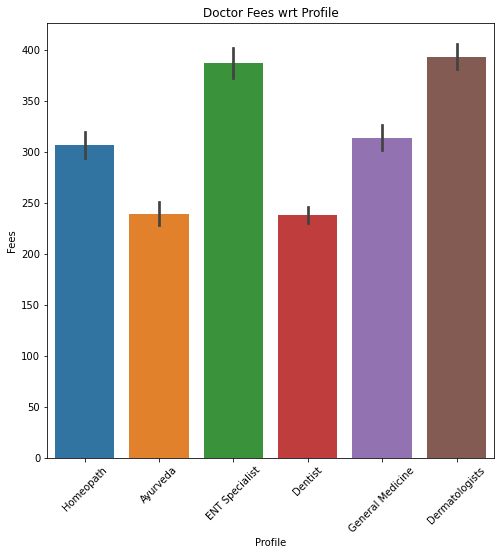

In [32]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=train)
plt.title("Doctor Fees wrt Profile")
plt.xticks(rotation=45)
plt.show()

We can observe that Ent Specialist and Dermatologists have the highest fees compared to other profiles.

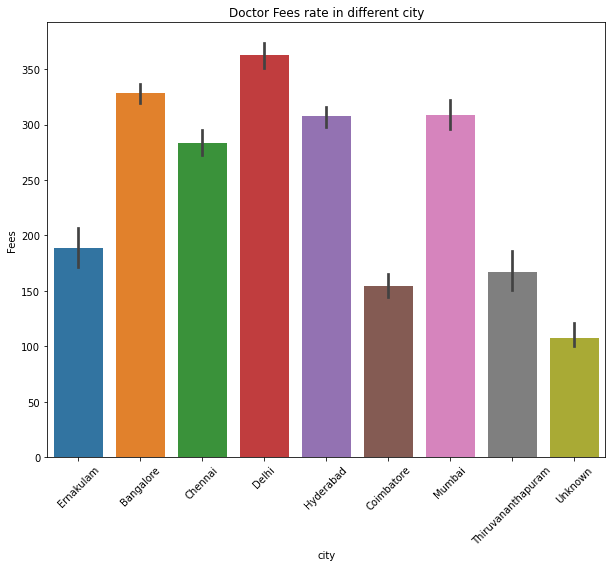

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x='city',y='Fees',data=train)
plt.title("Doctor Fees rate in different city")
plt.xticks(rotation=45)
plt.show()

Obserrvations:
    We can observe that Top cities like bangalore,hyderabad ,mumbai,chennai have the highest doctor fee compared to other cities.

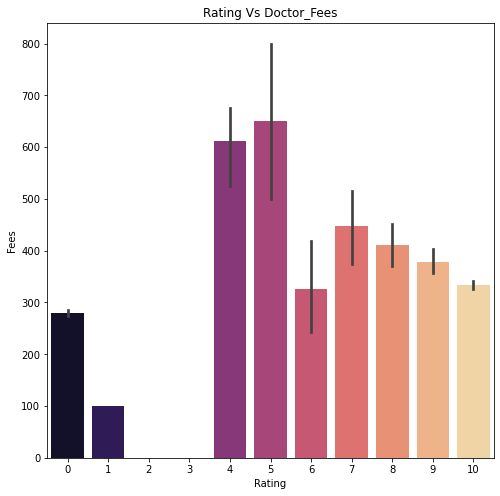

In [34]:
#plotting with rating
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=train,palette='magma')
plt.title("Rating Vs Doctor_Fees")
plt.show()

Observations: We can see that highest rating does not provide highest fees.The Highest fees are provided to ratings 4 and 5

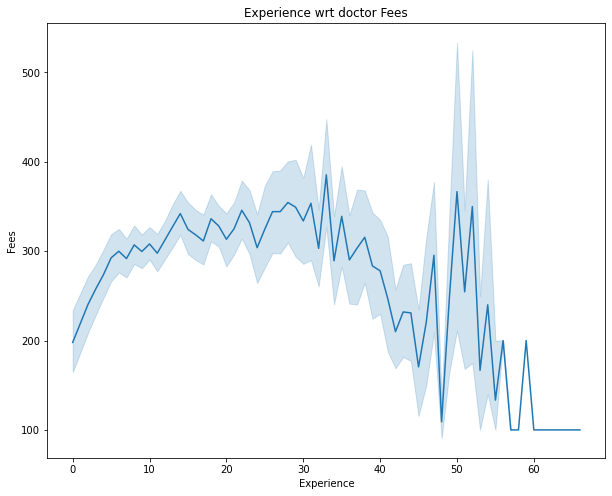

In [35]:
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Experience',y='Fees',data=train)
ax.set_title("Experience wrt doctor Fees")
plt.show()

Observations:
    we can observe that the highest fees are paid to the doctors having experience from 50 to 55 years

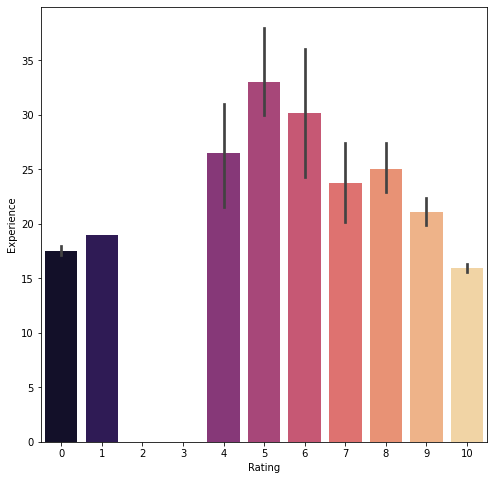

In [36]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Experience',data=train,palette='magma')
plt.show()

Observations:
    The highest rating is given to doctors having experience of 15 to 20 years

Let us encode the categorical columns profile and city

In [37]:
from sklearn import preprocessing
Le = preprocessing.LabelEncoder()

In [38]:
train['city']=Le.fit_transform(train['city'])

In [39]:
train['Profile']=Le.fit_transform(train['Profile'])

In [40]:
train.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,area,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,5,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,4,0,0,0,1,0,0,0,0,0,1
1,12,10,0,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,0,0,0,1,0,0,0,0,0,0,0
2,9,0,3,NaN,300,Mathikere - BEL,0,1,0,0,0,0,0,0,0,0,0
3,12,0,0,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,0,0,0,1,0,0,0,0,0,0,0
4,20,10,0,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,1,0,0,1,0,0,0,0,0,0,0


Data Cleaning: We can drop the columns Miscellaneious_info as it has messy data, and also we can drop area column as city has better data reffering the cities.

In [41]:
train.drop(['area','Miscellaneous_Info'],axis=1,inplace=True)

In [42]:
train.head()

,Experience,Rating,Profile,Fees,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,5,100,4,0,0,0,1,0,0,0,0,0,1
1,12,10,0,350,0,0,0,1,0,0,0,0,0,0,0
2,9,0,3,300,0,1,0,0,0,0,0,0,0,0,0
3,12,0,0,250,0,0,0,1,0,0,0,0,0,0,0
4,20,10,0,250,1,0,0,1,0,0,0,0,0,0,0


Checking Correlation:

In [43]:
train.corr()

,Experience,Profile,Fees,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
Experience,1.000000,0.202073,0.002117,0.017615,0.271347,-0.196268,-0.047150,-0.114191,-0.067704,0.093778,-0.120213,0.097549,0.111103,0.008510
Profile,0.202073,1.000000,0.145226,-0.015026,0.355290,-0.473295,-0.559943,0.583268,-0.087903,0.093610,-0.059195,0.203958,0.076358,0.273052
Fees,0.002117,0.145226,1.000000,-0.035898,0.271038,-0.198635,-0.139891,-0.002423,0.163811,0.128413,0.113091,0.040921,0.011560,0.018601
city,0.017615,-0.015026,-0.035898,1.000000,-0.062930,-0.015428,0.045055,0.016755,-0.012996,-0.026247,-0.001778,-0.003625,-0.085126,0.032806
MBBS,0.271347,0.355290,0.271038,-0.062930,1.000000,-0.512244,-0.358911,-0.355083,0.314207,0.263449,0.213185,0.220358,0.206347,-0.164871
BDS,-0.196268,-0.473295,-0.198635,-0.015428,-0.512244,1.000000,-0.208341,-0.206141,-0.182900,-0.148092,-0.123730,-0.121943,-0.113622,-0.096301
BAMS,-0.047150,-0.559943,-0.139891,0.045055,-0.358911,-0.208341,1.000000,-0.145019,-0.128669,-0.104182,-0.087044,-0.078722,-0.079932,-0.067747
BHMS,-0.114191,0.583268,-0.002423,0.016755,-0.355083,-0.206141,-0.145019,1.000000,-0.127311,-0.103082,-0.086124,-0.077760,-0.079088,0.349109
MD - Dermatology,-0.067704,-0.087903,0.163811,-0.012996,0.314207,-0.182900,-0.128669,-0.127311,1.000000,-0.091460,0.637946,-0.075311,-0.064618,-0.059475
MS - ENT,0.093778,0.093610,0.128413,-0.026247,0.263449,-0.148092,-0.104182,-0.103082,-0.091460,1.000000,-0.061872,-0.060978,0.168226,-0.048156


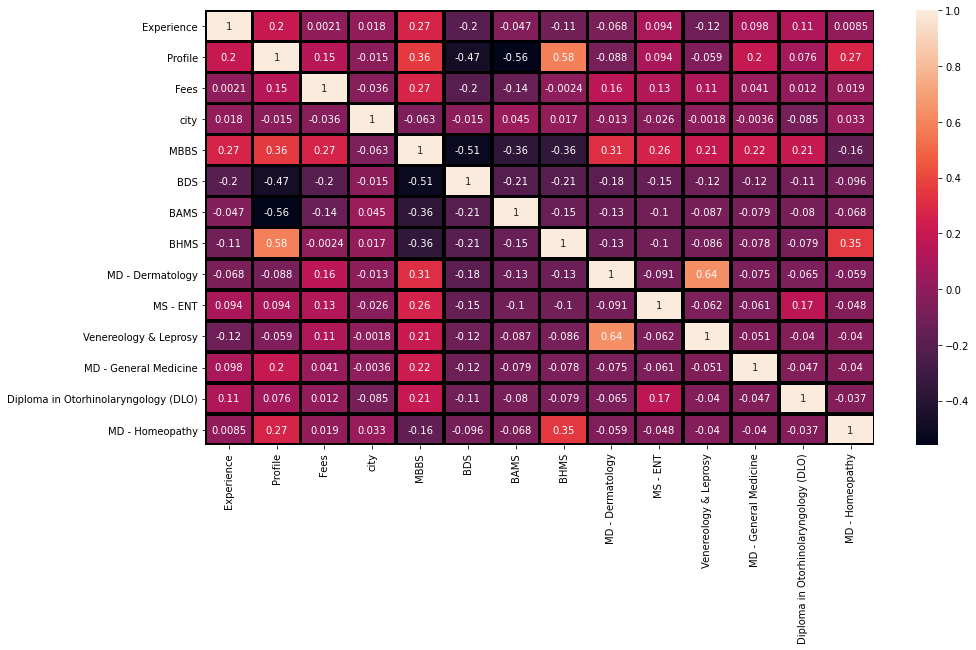

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),linewidth=2.5,annot=True,linecolor="black")

Checking Skewness:

In [45]:
train.skew()

Experience                              0.991089
Rating                                  0.240670
Profile                                 0.108803
Fees                                    0.751870
city                                    0.010640
MBBS                                    0.118000
BDS                                     1.293695
BAMS                                    2.229777
BHMS                                    2.261706
MD - Dermatology                        2.639954
MS - ENT                                3.403459
Venereology & Leprosy                   4.171950
MD - General Medicine                   4.239699
Diploma in Otorhinolaryngology (DLO)    4.581912
MD - Homeopathy                         5.475409
dtype: float64

Observations: we can observe many of the columns are having skewness.

Splitting the data frame into train test split to build a model

In [46]:
x=train.drop(['Fees'],axis=1)
y=train['Fees']

Removing Skewness through power transform

In [47]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [48]:
x

array([[ 0.73735682,  1.13034564,  1.42055919, ..., -0.22407904,
        -0.20878802,  5.65099121],
       [-0.32517958,  1.13034564, -1.64414533, ..., -0.22407904,
        -0.20878802, -0.17696011],
       [-0.68837382, -0.89678878,  0.41883046, ..., -0.22407904,
        -0.20878802, -0.17696011],
       ...,
       [ 1.76899411,  1.13034564,  0.94015599, ..., -0.22407904,
        -0.20878802, -0.17696011],
       [-0.0134478 ,  1.07300269,  0.94015599, ...,  4.462711  ,
        -0.20878802, -0.17696011],
       [ 0.17358896,  1.13034564, -0.82224914, ..., -0.22407904,
        -0.20878802, -0.17696011]])

Standard Scaling:

In [49]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()

In [50]:
x=scale.fit_transform(x)

In [51]:
x

array([[ 0.73735682,  1.13034564,  1.42055919, ..., -0.22407904,
        -0.20878802,  5.65099121],
       [-0.32517958,  1.13034564, -1.64414533, ..., -0.22407904,
        -0.20878802, -0.17696011],
       [-0.68837382, -0.89678878,  0.41883046, ..., -0.22407904,
        -0.20878802, -0.17696011],
       ...,
       [ 1.76899411,  1.13034564,  0.94015599, ..., -0.22407904,
        -0.20878802, -0.17696011],
       [-0.0134478 ,  1.07300269,  0.94015599, ...,  4.462711  ,
        -0.20878802, -0.17696011],
       [ 0.17358896,  1.13034564, -0.82224914, ..., -0.22407904,
        -0.20878802, -0.17696011]])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [53]:
#Making Root Mean Squared log error for using as metrics for the models.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
lr_reg=LinearRegression()
knn_reg = KNeighborsRegressor()
svm_reg = SVR()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [56]:
for reg in (lr_reg,knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    print(reg, score(y_pred,y_test))

LinearRegression() 0.7756878113369453
KNeighborsRegressor() 0.7734903304347222
SVR() 0.7864550982591307
DecisionTreeRegressor() 0.6799903761606484
RandomForestRegressor() 0.7651371068342953


As We can see best model to fit is SVR so let us do parameter tuning with grid search

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [78]:
param = {'kernel' : ('linear', 'poly', 'rbf'),'C' : [0.1,1,10],'gamma' : ('auto','scale')},

modelsvr = SVR()

grids = GridSearchCV(modelsvr,param_grid=param,cv=5)

In [79]:
grids.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=({'C': [0.1, 1, 10], 'gamma': ('auto', 'scale'),
                          'kernel': ('linear', 'poly', 'rbf')},))

In [82]:
print("best_score:",grids.best_score_)
print("best_params:\n",grids.best_params_)

best_score: 0.11150352786858295
best_params:
 {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [84]:
predictions = grids.predict(x_test)
print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.7953388558554348


In [89]:
import pickle
filename= 'Doctorsfee.pkl'
pickle.dump(grids,open(filename,'wb'))